# Interact Exercise 4

## Imports

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [94]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.display import display

## Line with Gaussian noise

Write a function named `random_line` that creates `x` and `y` data for a line with y direction random noise that has a normal distribution $N(0,\sigma^2)$:

$$
y = m x + b + N(0,\sigma^2)
$$

Be careful about the `sigma=0.0` case.

In [95]:
def random_line(m, b, sigma, size=10):
    """Create a line y = m*x + b + N(0,sigma**2) between x=[-1.0,1.0]
    
    Parameters
    ----------
    m : float
        The slope of the line.
    b : float
        The y-intercept of the line.
    sigma : float
        The standard deviation of the y direction normal distribution noise.
    size : int
        The number of points to create for the line.
    
    Returns
    -------
    x : array of floats
        The array of x values for the line with `size` points.
    y : array of floats
        The array of y values for the lines with `size` points.
    """
    f=np.linspace(-1.0,1.0, size)
    N=np.empty(size)
    if sigma == 0.0:
        g=m*f+b
    else:
        for i in range(size):
            N[i]=np.random.normal(0,sigma**2)
        g=m*f+b+N
    return(f, g)

In [96]:
m = 0.0; b = 1.0; sigma=0.0; size=3
x, y = random_line(m, b, sigma, size)
assert len(x)==len(y)==size
assert list(x)==[-1.0,0.0,1.0]
assert list(y)==[1.0,1.0,1.0]
sigma = 1.0
m = 0.0; b = 0.0
size = 500
x, y = random_line(m, b, sigma, size)
assert np.allclose(np.mean(y-m*x-b), 0.0, rtol=0.1, atol=0.1)
assert np.allclose(np.std(y-m*x-b), sigma, rtol=0.1, atol=0.1)

Write a function named `plot_random_line` that takes the same arguments as `random_line` and creates a random line using `random_line` and then plots the `x` and `y` points using Matplotlib's `scatter` function:

* Make the marker color settable through a `color` keyword argument with a default of `red`.
* Display the range $x=[-1.1,1.1]$ and $y=[-10.0,10.0]$.
* Customize your plot to make it effective and beautiful.

In [ ]:
def ticks_out(ax):
    """Move the ticks to the outside of the box."""
    ax.get_xaxis().set_tick_params(direction='out', width=1, which='both')
    ax.get_yaxis().set_tick_params(direction='out', width=1, which='both')

In [101]:
def plot_random_line(m, b, sigma, size=10, color='red'):
    """Plot a random line with slope m, intercept b and size points."""
    X, Y = random_line(m, b, sigma, size=10)
    plt.plot(X,Y, color)
    plt.title('A line with Gaussian Noise')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-1.1,1.1)
    plt.ylim(-10,10)
    plt.tick_params(axis='both', length=0)

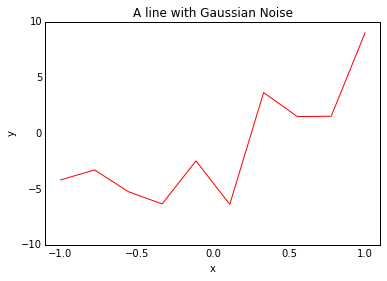

In [102]:
plot_random_line(5.0, -1.0, 2.0, 50)

In [103]:
assert True # use this cell to grade the plot_random_line function

Use `interact` to explore the `plot_random_line` function using:

* `m`: a float valued slider from `-10.0` to `10.0` with steps of `0.1`.
* `b`: a float valued slider from `-5.0` to `5.0` with steps of `0.1`.
* `sigma`: a float valued slider from `0.0` to `5.0` with steps of `0.01`.
* `size`: an int valued slider from `10` to `100` with steps of `10`.
* `color`: a dropdown with options for `red`, `green` and `blue`.

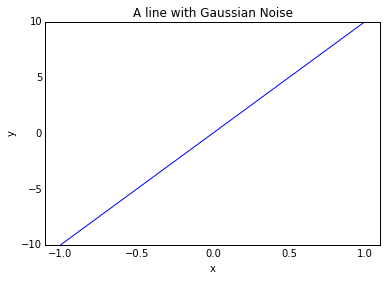

In [104]:
interact(plot_random_line, m=(-10.0,10.0,0.1), b=(-5.0,5.0,.1), sigma=(0.0,5.0,.01), size=(10,100,10), color=('red', 'green', 'blue'))

In [ ]:
#### assert True # use this cell to grade the plot_random_line interact